In [1]:
import numpy as np

# Process Iris data

In [2]:
with open("iris/iris.data") as f:
    lines = [l[:-1] for l in f.readlines()]
    
# Put numbers on the strings
n = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
x = [n.index(l.split(",")[-1]) for l in lines if l != ""]
x = np.array(x, dtype="uint8")

# Build an array with everything else
y = [[float(j) for j in i.split(",")[:-1]] for i in lines if i != ""]
y = np.array(y)

# Shuffle things up
i = np.argsort(np.random.random(x.shape[0]))
x = x[i]
y = y[i]

np.save("iris/iris_features.npy", y)
np.save("iris/iris_labels.npy", x)

# Process breast cancer data

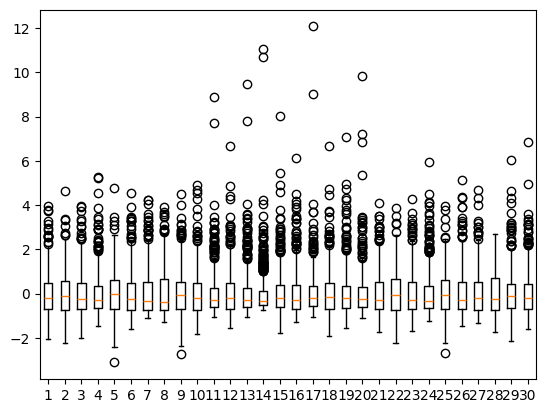

In [3]:
import matplotlib.pyplot as plt

with open("breast/wdbc.data") as f:
    lines = [i[:-1] for i in f.readlines() if i!=""]
    
n= ["B", "M"]
x = np.array([n.index(i.split(",")[1]) for i in lines],dtype="uint8")
y = np.array([[float(j) for j in i.split(",")[2:]] for i in lines])
i = np.argsort(np.random.random(x.shape[0]))
x = x[i]
y = y[i]
z = (y - y.mean(axis=0)) / y.std(axis=0)

np.save("breast/bc_features.npy", y)
np.save("breast/bc_features_standard.npy",z)
np.save("breast/bc_labels.npy", x)
plt.boxplot(z)
plt.show()

# Process MNIST data

In [4]:
import keras
from keras.datasets import mnist

(xtrn, ytrn), (xtst, ytst) = mnist.load_data()
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]

np.save("mnist/mnist_train_images.npy", xtrn)
np.save("mnist/mnist_train_labels.npy", ytrn)
np.save("mnist/mnist_test_images.npy", xtst)
np.save("mnist/mnist_test_labels.npy", ytst)

xtrnv = xtrn.reshape((60000,28*28))
xtstv = xtst.reshape((10000, 28*28))
np.save("mnist/mnist_train_vectors.npy", xtrnv)
np.save("mnist/mnist_test_vectors.npy", xtstv)

idx = np.argsort(np.random.random(28*28))
for i in range(60000):
    xtrnv[i,:] = xtrnv[i, idx]
for i in range(10000):
    xtstv[i,:] = xtstv[i, idx]
np.save("mnist/mnist_train_scrambled_vectors.npy", xtrnv)
np.save("mnist/mnist_test_scrambled_vectors.npy", xtstv)

t = np.zeros((60000,28,28))
for i in range(60000):
    t[i,:,:] = xtrnv[i,:].reshape((28,28))
np.save("mnist/mnist_train_scrambled_images.npy", t)
t = np.zeros((10000,28,28))
for i in range(10000):
    t[i,:,:] = xtstv[i,:].reshape((28,28))
np.save("mnist/mnist_test_scrambled_images.npy", t)

2026-01-12 22:27:12.419565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-12 22:27:12.423776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-12 22:27:12.695342: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-12 22:27:15.535361: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computat

# Process CIFAR-10 data

In [5]:
from keras.datasets import cifar10

(xtrn, ytrn), (xtst, ytst) = cifar10.load_data()
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]

np.save("cifar10/cifar10_train_images.npy", xtrn)
np.save("cifar10/cifar10_train_labels.npy", ytrn)
np.save("cifar10/cifar10_test_images.npy", xtst)
np.save("cifar10/cifar10_test_labels.npy", ytst)

xtrnv = xtrn.reshape((50000, 32*32*3))
xtstv = xtst.reshape((10000, 32*32*3))
np.save("cifar10/cifar10_train_vectors.npy", xtrnv)
np.save("cifar10/cifar10_test_vectors.npy", xtstv)

# Data augmentation

## Principal Component Analysis (Iris)

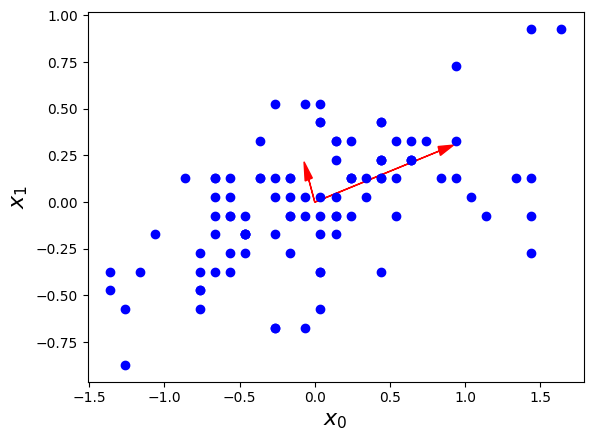

In [6]:
from sklearn import decomposition

x = np.load("iris/iris_features.npy")[:,:2]
y = np.load("iris/iris_labels.npy")

idx = np.where(y!=0)
x = x[idx]
x[:,0] -= x[:,0].mean()
x[:,1] -= x[:,1].mean()

pca = decomposition.PCA(n_components=2)
pca.fit(x)
v=pca.explained_variance_ratio_

ax = plt.axes()
x0 = v[0]*pca.components_[0,0]
y0 = v[0]*pca.components_[0,1]
ax.arrow(0,0,x0,y0, head_width=0.05, head_length=0.1, fc='r', ec='r')
x1 = v[1]*pca.components_[1,0]
y1 = v[1]*pca.components_[1,1]
ax.arrow(0,0,x1,y1, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.scatter(x[:,0], x[:,1], marker='o', color='b')
plt.xlabel("$x_0$", fontsize=16)
plt.ylabel("$x_1$", fontsize=16)
plt.show()


In [7]:
def generateData(pca, x, start):
    original = pca.components_.copy()
    ncomp = pca.components_.shape[0]
    a = pca.transform(x)
    for i in range(start, ncomp):
        pca.components_[i,:] += np.random.normal(scale=0.1, size=ncomp)
    b = pca.inverse_transform(a)
    pca.components_ = original.copy()
    return b

def main():
    x = np.load("iris/iris_features.npy")
    y = np.load("iris/iris_labels.npy")
    
    N=120
    x_train = x[:N]
    y_train = y[:N]
    x_test = x[N:]
    y_test = y[N:]
    
    pca = decomposition.PCA(n_components=4)
    pca.fit(x)
    print(pca.explained_variance_ratio_)
    start = 2
    nsets = 10
    nsamp = x_train.shape[0]
    newx = np.zeros((nsets*nsamp, x_train.shape[1]))
    newy = np.zeros(nsets*nsamp, dtype='uint8')
    
    for i in range(nsets):
        if (i==0):
            newx[0:nsamp,:] = x_train
            newy[0:nsamp] = y_train
        else:
            newx[(i*nsamp):((i+1)*nsamp),:] = generateData(pca, x_train, start)
            newy[(i*nsamp):((i+1)*nsamp)] = y_train
            
    idx = np.argsort(np.random.random(nsets*nsamp))
    newx = newx[idx]
    newy = newy[idx]
    np.save("iris/iris_train_features_augmented.npy", newx)
    np.save("iris/iris_train_labels_augmented.npy", newy)
    np.save("iris/iris_test_features_augmented.npy", x_test)
    np.save("iris/iris_test_labels_augmented.npy", y_test)

## Image transformation (CIFAR-10)

In [8]:
from PIL import Image

def augment(im, dim):
    img = Image.fromarray(im)
    if (np.random.random() < 0.5):
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    if (np.random.random() < 0.3333):
        z = (32-dim)/2
        r = 10*np.random.random()-5
        img = img.rotate(r, resample=Image.BILINEAR)
        img = img.crop((z,z,32-z,32-z))
    else:
        x = int((32-dim-1)*np.random.random())
        y = int((32-dim-1)*np.random.random())
        img = img.crop((x,y,x+dim,y+dim))
    return np.array(img)

def main():
    x = np.load("cifar10/cifar10_train_images.npy")
    y = np.load("cifar10/cifar10_train_labels.npy")
    factor = 10
    dim = 28
    z = (32-dim)/2
    newx = np.zeros((x.shape[0]*factor, dim,dim,3), dtype="uint8")
    newy = np.zeros(y.shape[0]*factor, dtype="uint8")
    k=0 
    for i in range(x.shape[0]):
        im = Image.fromarray(x[i,:])
        im = im.crop((z,z,32-z,32-z))
        newx[k,...] = np.array(im)
        newy[k] = y[i]
        k += 1
        for _ in range(factor-1):
            newx[k,...] = augment(x[i,:], dim)
            newy[k] = y[i]
            k += 1
    idx = np.argsort(np.random.random(newx.shape[0]))
    newx = newx[idx]
    newy = newy[idx]
    np.save("cifar10/cifar10_aug_train_images.npy", newx)
    np.save("cifar10/cifar10_aug_train_labels.npy", newy)

    x = np.load("cifar10/cifar10_test_images.npy")
    newx = np.zeros((x.shape[0], dim,dim,3), dtype="uint8")
    for i in range(x.shape[0]):
        im = Image.fromarray(x[i,:])
        im = im.crop((z,z,32-z,32-z))
        newx[i,...] = np.array(im)
    np.save("cifar10/cifar10_aug_test_images.npy", newx)

main()

/tmp/ipykernel_166066/3086272912.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newy[k] = y[i]
/tmp/ipykernel_166066/3086272912.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newy[k] = y[i]
